<a href="https://colab.research.google.com/github/gioviat/classiclearning/blob/main/LearningClassico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

x_train.shape

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

flat_train = np.reshape(x_train,[x_train.shape[0],28*28]) #Tutto dataset
flat_test = np.reshape(x_test,[x_test.shape[0],28*28]) #Tutto testset

flat_val = np.reshape(x_val,[x_val.shape[0],28*28])

print(flat_train.shape)
print(flat_val.shape)

(50000, 784)
(10000, 784)


In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28 * 28), dtype='float32'))
model.add(tf.keras.layers.Dense(2000, activation='relu', name='hidden'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='output'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)  # about 0.05  linear and 0.03 eigvalue/0.01eigvector for the non linear

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=False)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2000)              1570000   
_________________________________________________________________
output (Dense)               (None, 10)                20010     
Total params: 1,590,010
Trainable params: 1,590,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 20

print("Fit model on training data")
history = model.fit(flat_train, y_train, batch_size=32, epochs=epochs, validation_data = (flat_val, y_val), verbose=1)

print("Evaluate on test data")
tested = model.evaluate(flat_test, y_test, batch_size=500, verbose=0)
print("Test loss, test accuracy:", tested)

Fit model on training data
Epoch 1/20
1563/1563 [==============================] - 7s 3ms/step - loss: 0.4647 - accuracy: 0.8817 - val_loss: 0.1835 - val_accuracy: 0.9469
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1724 - accuracy: 0.9540 - val_loss: 0.1578 - val_accuracy: 0.9599
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1483 - accuracy: 0.9614 - val_loss: 0.1707 - val_accuracy: 0.9592
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1206 - accuracy: 0.9676 - val_loss: 0.2037 - val_accuracy: 0.9569
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1261 - accuracy: 0.9690 - val_loss: 0.2430 - val_accuracy: 0.9584
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9732 - val_loss: 0.2025 - val_accuracy: 0.9631
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1030 - accuracy: 0.9761 - val_l

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


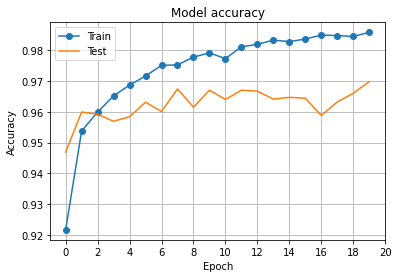

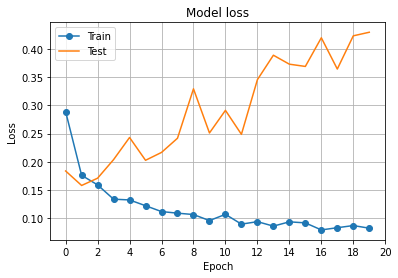

In [7]:
# Grafici accuracy/loss

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], linestyle = '-', marker = 'o')
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], linestyle = '-', marker = 'o')
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()